In [1]:
import pandas as pd

In [18]:
netflix = pd.read_csv("data/netflix_titles.csv")
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [27]:
len(netflix)

8807

- What is the total number of movies and TV shows available on Netflix for each year?

In [86]:
total_num = netflix.copy()

#change 'date added' column from str to datetime
total_num["date_added"] = pd.to_datetime(total_num["date_added"], errors='coerce')
total_num.loc[:, "year_added"] = total_num["date_added"].dt.year.astype('Int64')

#seperate movies and tvshows rows
movies_count = total_num.loc[total_num["type"] == "Movie"]
tvshows_count = total_num.loc[total_num["type"] == "TV Show"]

In [71]:
#new column for added on netflix year
#movies_count.loc[:, "year_added"] = movies_count["date_added"].dt.year
#tvshows_count.loc[:, "year_added"] = tvshows_count["date_added"].dt.year

In [150]:
#count how many movies and tv shows were added each year
combined_count = total_num.pivot_table(values="title", index="year_added", columns="type", aggfunc="count", fill_value=0)

In [151]:
combined_count

type,Movie,TV Show
year_added,,
2008,1,1
2009,2,0
2010,1,0
2011,13,0
2012,3,0
2013,6,4
2014,19,4
2015,56,17
2016,253,165


<Axes: xlabel='year_added'>

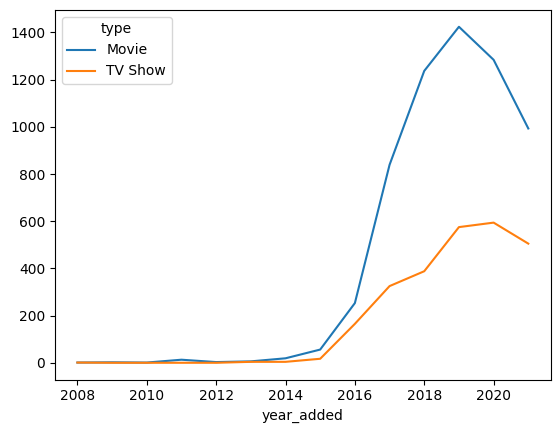

In [153]:
combined_count.plot(kind="line")